In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

import sys
import os

module_path = os.path.abspath('../') # root directory
if module_path not in sys.path:
    sys.path.append(module_path)

from snow.node.node import Node
from snow.node.network import Network
from snow.consensus.slush import SlushNode, SlushNetwork
from snow.consensus.snowflake import SnowflakeNode, SnowflakeNetwork

from snow.engine.slush_test import SlushSimulation
from snow.engine.snowflake_test import SnowflakeSimulation

# Slush simulation

## Simple tests

In [4]:
num_nodes, fixed_nodes, off_nodes = 10, 0, 0
sample_size = 20

initial_states = [random.choice([0, 1]) for _ in range(num_nodes)]

# num_ones = num_nodes//2 + 1
# initial_states = [1 for _ in range(num_ones)] + [0 for _ in range(num_ones, num_nodes)]
quorum = 15  # Example quorum
rounds = 15  # Number of rounds to simulate

# simulation = SlushSimulation(
#     num_nodes=num_nodes, 
#     fixed_nodes=fixed_nodes,
#     off_nodes=off_nodes,
#     initial_states=initial_states, 
#     sample_size = sample_size, 
#     quorum=quorum,
# )

# simulation.run(rounds=rounds)

nn = SlushNetwork.initialize_network(num_nodes=num_nodes, initial_states=initial_states, sample_size=sample_size, quorum=quorum)
nn.nodes

In [8]:
nn.nodes[0].preferred_state

1

# Snowflake Tests

In [2]:
num_nodes, fixed_nodes, off_nodes = 10, 0, 0
sample_size = 5

initial_states = [random.choice([0, 1]) for _ in range(num_nodes)]

quorum = 15  # Example quorum
beta = 15  # Number of rounds to simulate


nn = SnowflakeNetwork.initialize_network(
    num_nodes=num_nodes, 
    initial_states=initial_states, 
    sample_size=sample_size, 
    quorum=quorum,
    beta=beta,
)

nn.nodes

In [3]:
nn.nodes[0].rounds

0

- Testing honest nodes

In [3]:
num_nodes, fixed_nodes, off_nodes = 100, 0, 0
sample_size = 20
initial_states = [random.choice([0, 1]) for _ in range(num_nodes)]
quorum = 15  # Example quorum
beta = 15  # beta value

simulation = SnowflakeSimulation(
    num_nodes=num_nodes, 
    fixed_nodes=fixed_nodes,
    off_nodes=off_nodes,
    initial_states=initial_states, 
    sample_size = sample_size, 
    quorum=quorum,
    beta = beta
)

states, rounds = simulation.run()
rounds


Initial distribution: {1: 48, 0: 52}
All nodes have finalized their states. Ending simulation.


{19: 36, 18: 50, 17: 13, 16: 1}

In [4]:
states

{0: 100}

- Repeated simulations

In [2]:
from collections import defaultdict

def run_multiple_simulations(num_simulations):
    overall_distribution = defaultdict(int)  # Initialize an empty distribution dictionary

    for _ in range(num_simulations):
        # Initialize the simulation parameters
        num_nodes, fixed_nodes, off_nodes = 100, 0, 0
        sample_size = 20
        initial_states = [random.choice([0, 1]) for _ in range(num_nodes)]
        quorum = 15  # Example quorum
        beta = 15  # beta value

        # Run the simulation
        simulation = SnowflakeSimulation(
            num_nodes=num_nodes, 
            fixed_nodes=fixed_nodes,
            off_nodes=off_nodes,
            initial_states=initial_states, 
            sample_size=sample_size, 
            quorum=quorum,
            beta=beta
        )
        states, rounds = simulation.run()
        
        # Update the overall distribution with results from this run
        for round_number, count in rounds.items():
            overall_distribution[round_number] += count

    # Convert defaultdict to a normal dictionary for easy display
    return dict(overall_distribution)


def plot_round_distribution(distribution):
    # Sort the distribution by the round numbers (keys)
    sorted_distribution = sorted(distribution.items())
    rounds, counts = zip(*sorted_distribution)

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(rounds, counts, width=0.8, color='skyblue', edgecolor='black')

    # Add labels and title
    plt.xlabel("Number of Rounds")
    plt.ylabel("Frequency")
    plt.title("Round Distribution from Simulation")
    
    # Display grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()


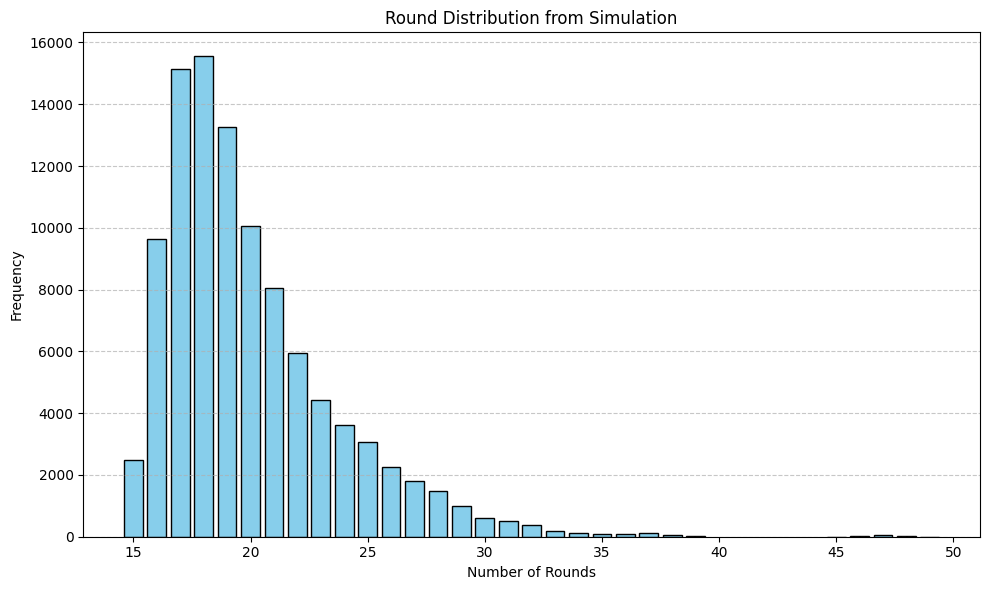

In [4]:
num_simulations = 1000
overall_distribution = run_multiple_simulations(num_simulations)
plot_round_distribution(overall_distribution)
